# Data Preprocessing Before Building A Model
covered most of the crucial steps of data preprocessing before feeding them into machine learning models.

### Dataset
- [Life Expectancy](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) from kaggle

### Libraries
- numpy
- pandas
- matplotlib
- seaborn
- sklearn

# Tasks
- importing modules
- Read DataSet
- Sanity Check
    - Remove unnecessary columns
    - Remove duplicates
    - Formatting column names
- Exploratory Data Analysis
    - Histogram
    - Boxplot
    - Scatterplot
    - Heatmap
- Handling Missing Values
    - KNNImputer
- Handling Outliers
- Encoding Data
    - Label encoding

In [1]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from pathlib import Path

In [2]:
# reading dataset
file = Path(r"../files/LifeExpectancyData.csv")
df = pd.read_csv(file)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Sanity Check

In [4]:
# check columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

# Replace occurrences of two or more consecutive spaces in column names with a single space
df.columns = df.columns.str.replace(r"\s{2,}", " ")

# Convert column names to title case
df.columns = df.columns.str.title()

**One Liner:** df.columns = df.columns.str.strip().str.replace(r"\s{2,}", " ").str.title()

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [7]:
# Convert abbreviate columns names to upper case
df.rename(columns={'Bmi': "BMI", 'Gdp': "GDP", 'Hiv/Aids': "HIV/AIDS"}, inplace=True)

In [8]:
# check update
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [9]:
# shape of the dataset
row, col = df.shape
print("Number of Rows:", row)
print("Number of Columns:", col)

Number of Rows: 2938
Number of Columns: 22


In [10]:
# checking for duplicates row(s)
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [11]:
# count total duplicate rows
df.duplicated().sum()

0

In [12]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

In [13]:
# columns that contains null
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life Expectancy                     True
Adult Mortality                     True
Infant Deaths                      False
Alcohol                             True
Percentage Expenditure             False
Hepatitis B                         True
Measles                            False
BMI                                 True
Under-Five Deaths                  False
Polio                               True
Total Expenditure                   True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
Thinness 1-19 Years                 True
Thinness 5-9 Years                  True
Income Composition Of Resources     True
Schooling                           True
dtype: bool

In [14]:
# null percantage
df.isnull().sum() / df.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life Expectancy                     0.340368
Adult Mortality                     0.340368
Infant Deaths                       0.000000
Alcohol                             6.603131
Percentage Expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
Under-Five Deaths                   0.000000
Polio                               0.646698
Total Expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness 1-19 Years                 1.157250
Thinness 5-9 Years                  1.157250
Income Composition Of Resources     5.684139
Schooling                           5.547992
dtype: flo

In [15]:
# rows that consist of null value
df[df.isnull().any(axis=1)]

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


# Exploratory Data Analysis (EDA)

In [16]:
# descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life Expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
Percentage Expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-Five Deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [17]:
# descriptive statistics for object columns
df.describe(include="object").T

,count,unique,top,freq
Country,2938,193,Syrian Arab Republic,16
Status,2938,2,Developing,2426


**Data Distribution (Histogram)**

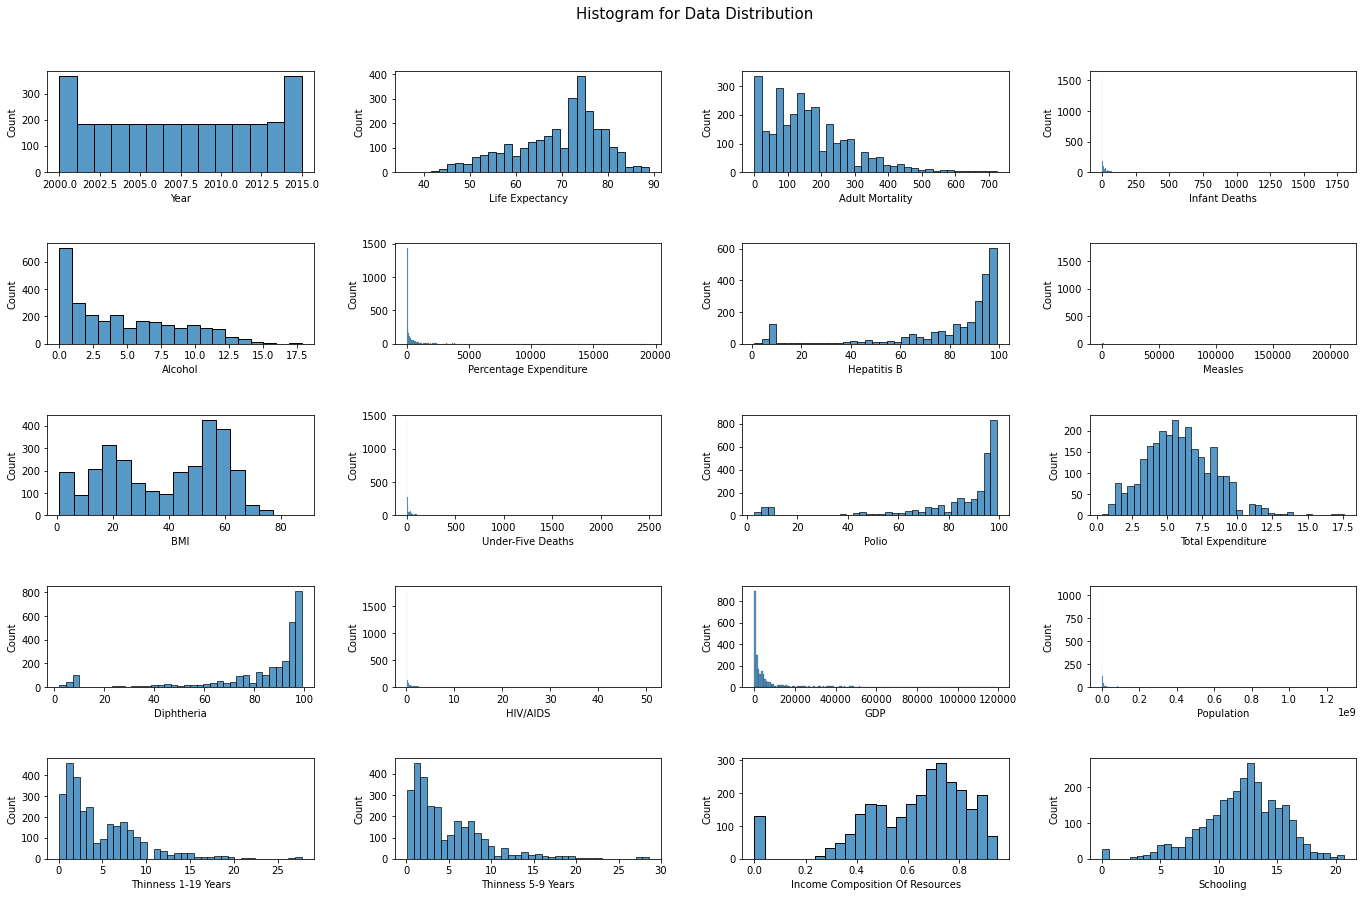

In [18]:
""" histogram for all columns at a single place for quick overview """

# set the number of rows and columns for the grid
rows, cols = 6, 4

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(df.select_dtypes(include="number").columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.histplot(data=df, x=col, ax=axes[row_pos, col_pos])
#     axes[row_pos, col_pos].set_title(col)

# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

or we can check one by one by running the following code
```python
# histogram for checking data distribution
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=i)
    plt.show()
```

**Checking Outliers (Boxplot)**

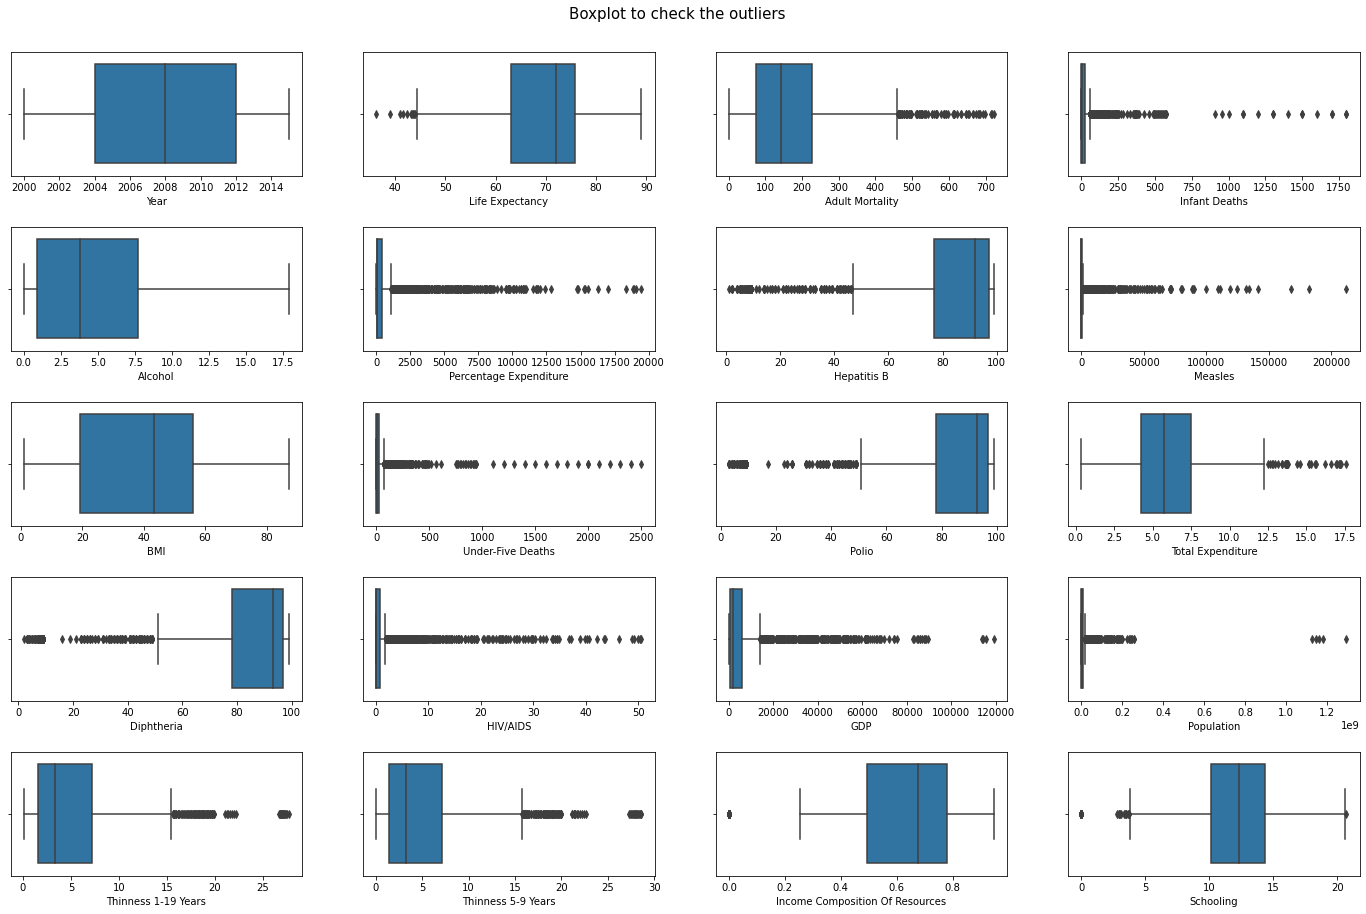

In [19]:
""" boxplot for all columns at a single place for quick overview """

# set the number of rows and columns for the grid
rows, cols = 6, 4

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=3.0)
fig.suptitle('Boxplot to check the outliers', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(df.select_dtypes(include="number").columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.boxplot(data=df, x=col, ax=axes[row_pos, col_pos])
#     axes[row_pos, col_pos].set_title(col)

# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

or we can check one by one by the running the following code
```python
# boxplot for checking outliers of the columns
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=i)
    plt.show()
```

**Relations between the columns with life expectancy columns (Scatter)**

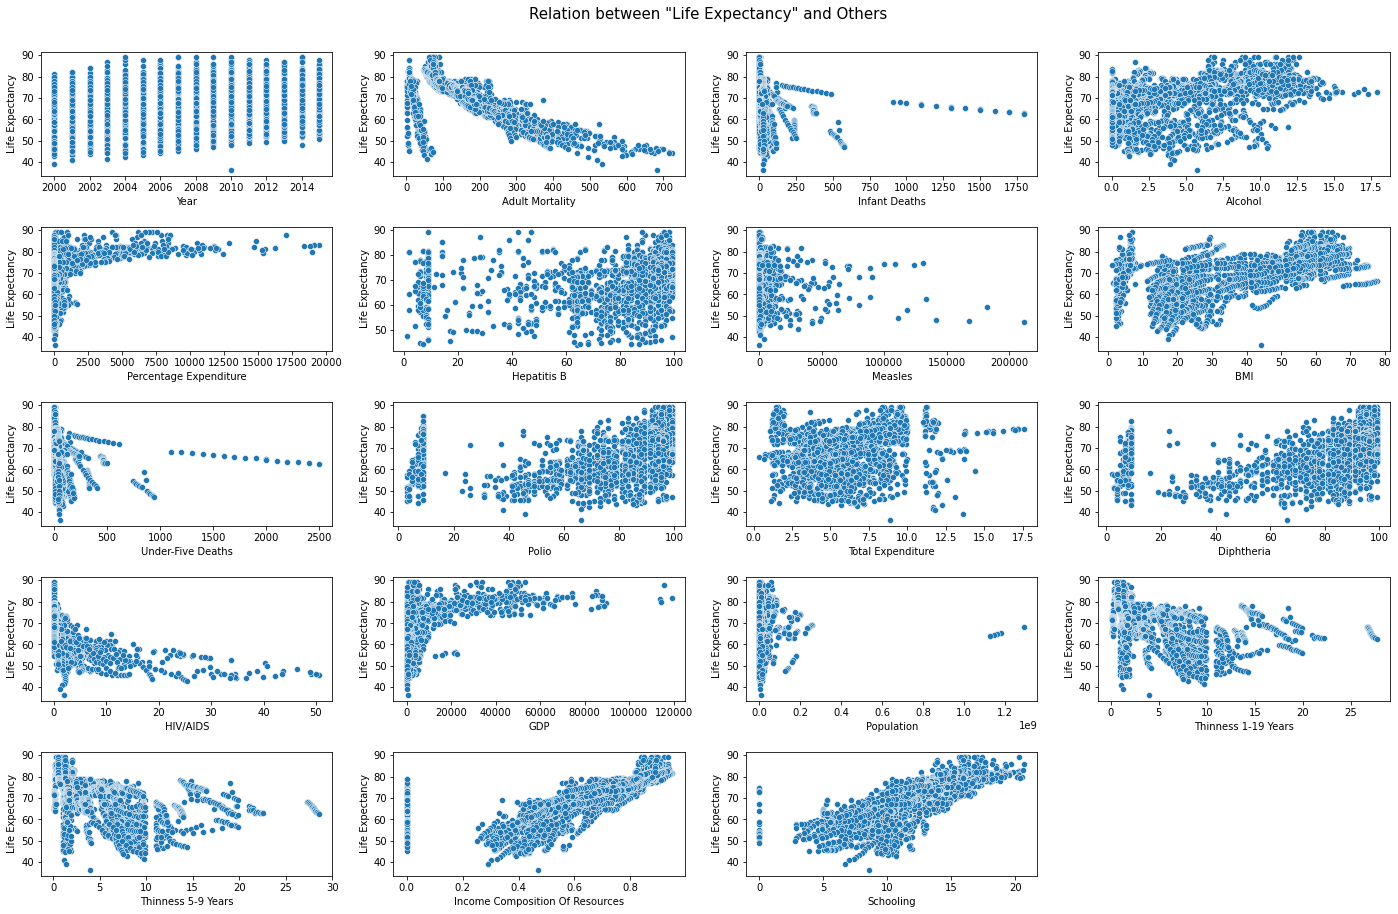

In [20]:
""" scatter diagram for finding the relations between all the columns and life expectancy columns """

# set the number of rows and columns for the grid
rows, cols = 6, 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=3.0)
fig.suptitle('Relation between "Life Expectancy" and Others', fontsize=15, y=1.01)

# Initialize a counter for positioning plots
i = 0
for col in df.select_dtypes(include="number").columns:
    
    # Skip the column if it is "Life Expectancy" (the target variable) or if it has only one unique value
    if col != "Life Expectancy":
        row_pos = i // cols
        col_pos = i % cols
        sns.scatterplot(data=df, x=col, y="Life Expectancy", ax=axes[row_pos, col_pos])
#         axes[row_pos, col_pos].set_title(col)
        i += 1


# Remove any empty subplots that are left over
for j in range(i, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

or we can check one by one by the running the following code
```python
# scatter to understand the relationship with the life expectancy
for i in df.select_dtypes(include="number").columns:
    if i != "Life Expectancy":
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=i, y="Life Expectancy")
        plt.show()
```

**Correlation of the data (Heatmap)**

In [21]:
correlation = df.select_dtypes(include="number").corr()

<AxesSubplot:>

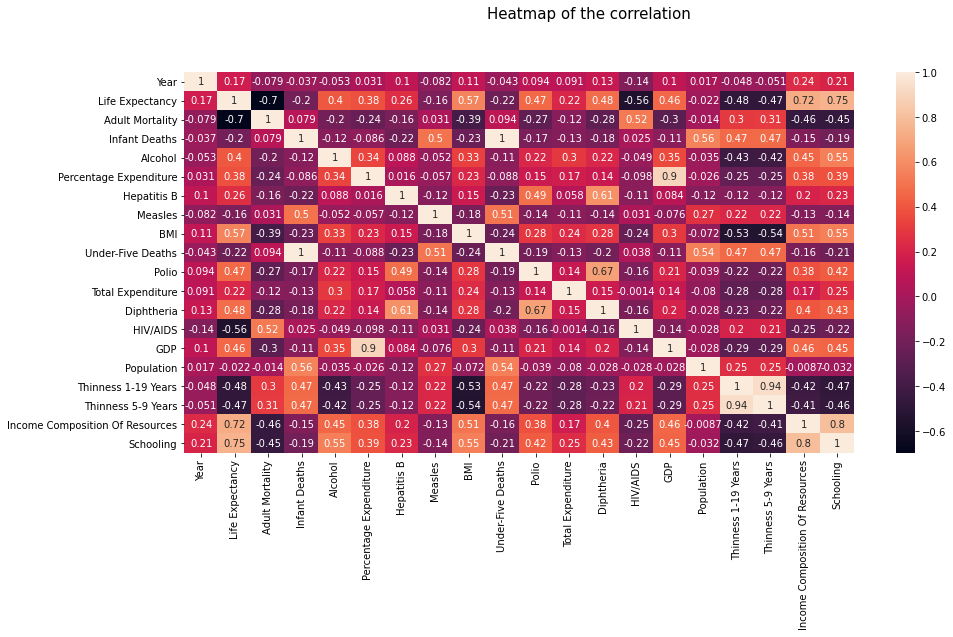

In [22]:
# heatmap of the correlation between the data
plt.figure(figsize=(15, 7))
plt.suptitle('Heatmap of the correlation', fontsize=15, y=1.01)
sns.heatmap(data=correlation, annot=True)

# Handling Missing Values
Using central tendency methods like mean or median to handle missing values would oversimplify the imputation process. These methods only look at the individual column and would fill missing values with a single value, ignoring how the missing data relates to other variables in the dataset. This approach would fail to capture the variability and patterns in the data, especially for skewed distributions. So we'll use KNNImputer algorithm here because it is a more reliable choice and it respects the relationships between variables and avoids the biases introduced by simplistic, column-wise imputation methods.

In [23]:
# getting numerical columns
num_col = df.select_dtypes(include="number").columns

# select columns that have null values
null_col = [col for col in num_col if df[col].isnull().any() == True]

In [24]:
null_col

['Life Expectancy',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'Thinness 1-19 Years',
 'Thinness 5-9 Years',
 'Income Composition Of Resources',
 'Schooling']

In [25]:
# initialize the KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# imputing missing values
for col in null_col:
    df[col] = imputer.fit_transform(df[[col]])

In [26]:
# checking dataset
# df

In [27]:
# checking missing value imputation
df.isnull().any()

Country                            False
Year                               False
Status                             False
Life Expectancy                    False
Adult Mortality                    False
Infant Deaths                      False
Alcohol                            False
Percentage Expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
Under-Five Deaths                  False
Polio                              False
Total Expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
Thinness 1-19 Years                False
Thinness 5-9 Years                 False
Income Composition Of Resources    False
Schooling                          False
dtype: bool

The imputation can be done based on the distribution of data specifically. For each country, the missing values in the column are replaced with the median of the non-missing values within that country. But it's not so good when the data are skewed
```python
# filling NaN of each column by the median of that column according to Country
for col in null_cols:
    df[col] = df.groupby("Country")[col].fillna(df[col].median())
```

# Handling Outliers
Replace outliers with more reasonable values.

In [28]:
# columns that need outliers treatment
ol_cols = ["Total Expenditure", "Thinness 1-19 Years", "Thinness 5-9 Years", "GDP"]

In [29]:
# function to getting wisker
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_wisker = q1 - 1.5 * iqr
    upper_wisker = q3 + 1.5 * iqr
    
    return lower_wisker, upper_wisker

In [30]:
# testing wisker
wisker(df["GDP"])

(-9773.52021495771, 17837.165679596183)

In [31]:
# handling the outliers to make the dataset more effective and analysable
for col in ol_cols:
    low_wisker, up_wisker = wisker(df[col])
    
    df[col] = np.where(df[col] < low_wisker, low_wisker, df[col])
    df[col] = np.where(df[col] > up_wisker, up_wisker, df[col])

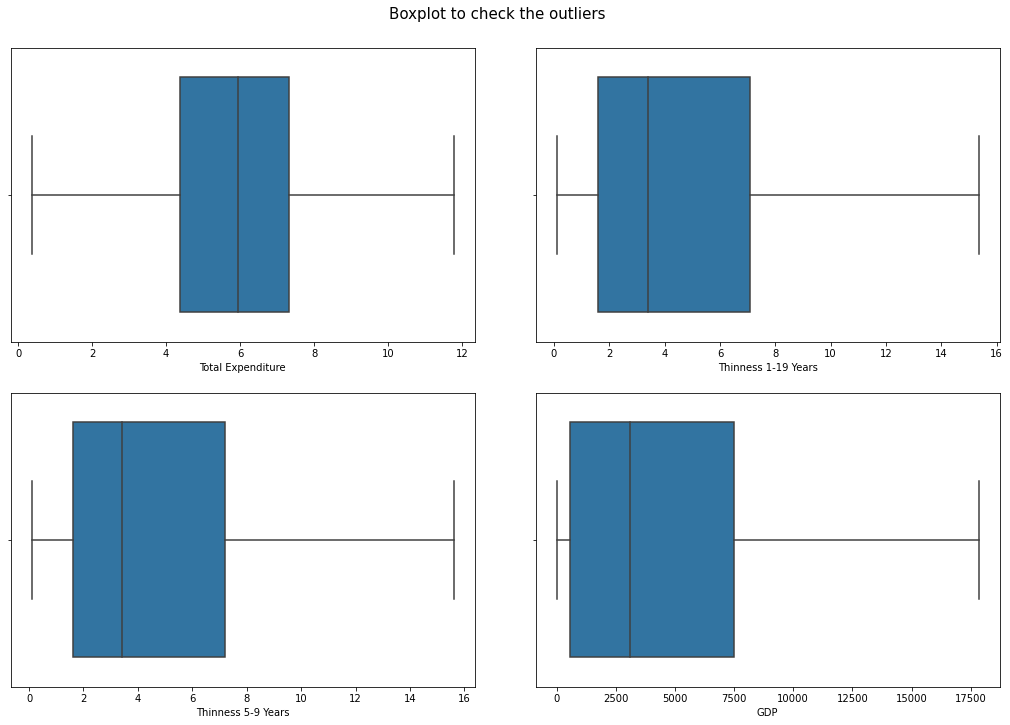

In [32]:
# checking outliers
rows, cols = 2, 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

# add a main title with bottom padding
fig.suptitle('Boxplot to check the outliers', fontsize=15, y=1.01)

for i, col in enumerate(ol_cols):
    row_pos = i // cols
    col_pos = i % cols
    sns.boxplot(data=df, x=col, ax=axes[row_pos, col_pos])

# remove empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

# Encoding Data
data encoding with label encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# initialize the LabelEncoder
le = LabelEncoder()

# getting object columns
object_cols = df.select_dtypes(include=['object']).columns

# label encoding with apply method
df[object_cols] = df.select_dtypes(include=['object']).apply(lambda col: le.fit_transform(col))

In [34]:
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


## This NoteBook is created by Tshihab07, Dept. of Computer Science and Engineering